In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

injuries = pd.read_csv('./data/injuries_2010-2020.csv')
injuries = injuries.drop('Acquired',axis=1)
injuries.head(5)

injuries['year'] = pd.DatetimeIndex(injuries['Date']).year
injuries


,Date,Team,Relinquished,Notes,year
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...,2010
1,2010-10-06,Pistons,Jonas Jerebko,torn right Achilles tendon (out indefinitely),2010
2,2010-10-06,Pistons,Terrico White,broken fifth metatarsal in right foot (out ind...,2010
3,2010-10-08,Blazers,Jeff Ayres,torn ACL in right knee (out indefinitely),2010
4,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely),2010
...,...,...,...,...,...
27100,2020-09-30,Lakers,NaN,activated from IL,2020
27101,2020-10-02,Heat,Bam Adebayo,strained neck (DTD),2020
27102,2020-10-02,Heat,Goran Dragic,placed on IL with torn plantar fascia in left ...,2020
27103,2020-10-02,Heat,NaN,activated from IL,2020


In [140]:
injuries.dtypes

Date            object
Team            object
Relinquished    object
Notes           object
year             int64
dtype: object

In [141]:
rules = pd.read_csv('./data/NBA Rules.csv',encoding='latin1')

In [142]:
rules.head(5)

,Rule,Category,Season,Date
0,Allowed replay during the last two minutes of ...,Clock,2010-2011,10/21/2010
1,During the last two minutes of regulation play...,Possession,2010-2011,10/21/2010
2,"Replay at any point during the game, to determ...",Fouls,2010-2011,10/21/2010
3,"Replay at any point during a game, to determin...",Fouls,2010-2011,10/21/2010
4,All 24-second shot clocks will display tenths ...,Clock,2011-2012,12/19/2011


In [143]:
injuries['Date'] = pd.to_datetime(injuries.Date)

In [144]:
rules.dtypes

Rule        object
Category    object
Season      object
Date        object
dtype: object

In [145]:
rules['Date'] = pd.to_datetime(rules.Date)

In [146]:
rules.head(5)

,Rule,Category,Season,Date
0,Allowed replay during the last two minutes of ...,Clock,2010-2011,2010-10-21
1,During the last two minutes of regulation play...,Possession,2010-2011,2010-10-21
2,"Replay at any point during the game, to determ...",Fouls,2010-2011,2010-10-21
3,"Replay at any point during a game, to determin...",Fouls,2010-2011,2010-10-21
4,All 24-second shot clocks will display tenths ...,Clock,2011-2012,2011-12-19


In [147]:
rules.dtypes

Rule                object
Category            object
Season              object
Date        datetime64[ns]
dtype: object

In [148]:
yearly_injuries = injuries.set_index(['Date'])
yearly_injuries = yearly_injuries['Notes'].resample('Y').agg(["count"])
yearly_injuries.head()

,count
Date,
2010-12-31,971
2011-12-31,1758
2012-12-31,3133
2013-12-31,2673
2014-12-31,2836


In [149]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

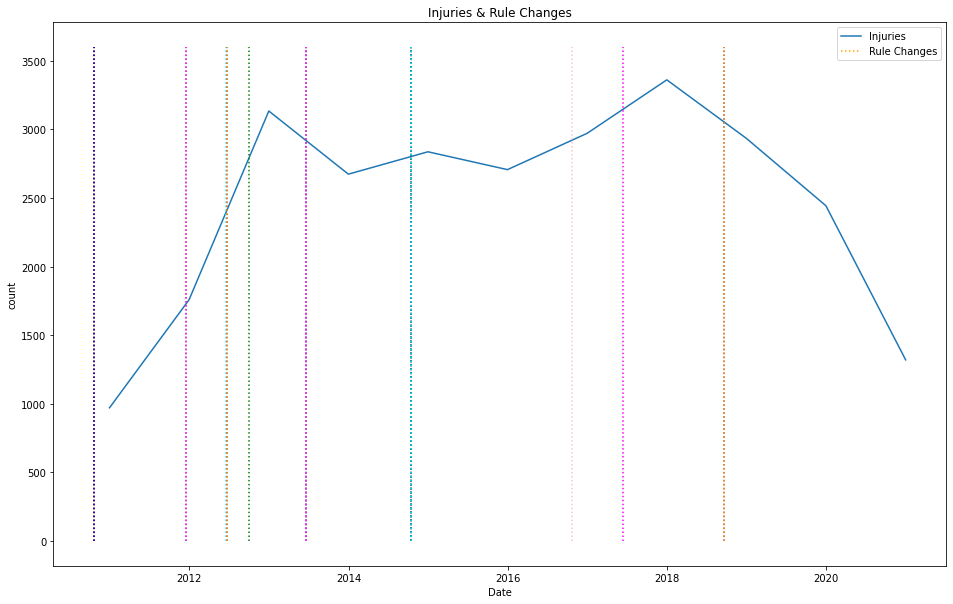

In [150]:
plt.figure(figsize=(16,10))
chart = sns.lineplot(x="Date",y="count",data=yearly_injuries, label='Injuries')
colors = ['Orange','Green','Red','Blue','Teal','Pink','Magenta','Cyan', 'Purple']
chart.vlines(x= rules.Date, ymin=0, ymax=3600, color=colors, linestyle=':', label='Rule Changes',)
plt.legend()
plt.plot()
plt.title('Injuries & Rule Changes')
plt.show